### 1. Import the Lib

In [49]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid

# checking for undersampling
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### 2. EDA

#### a. Import the data and visualize

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

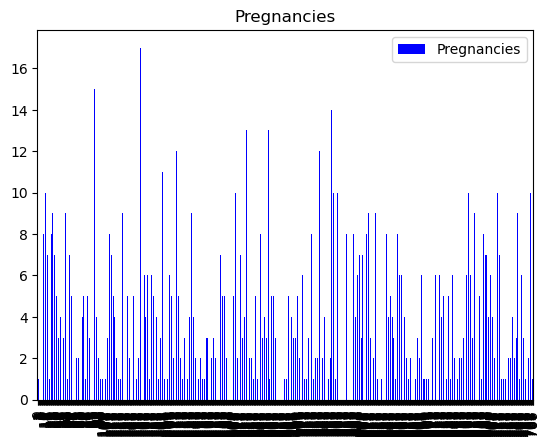

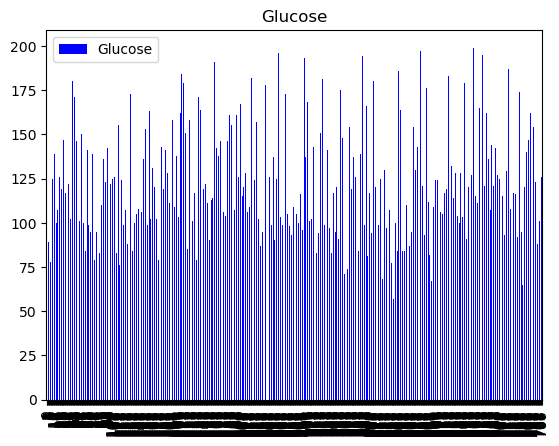

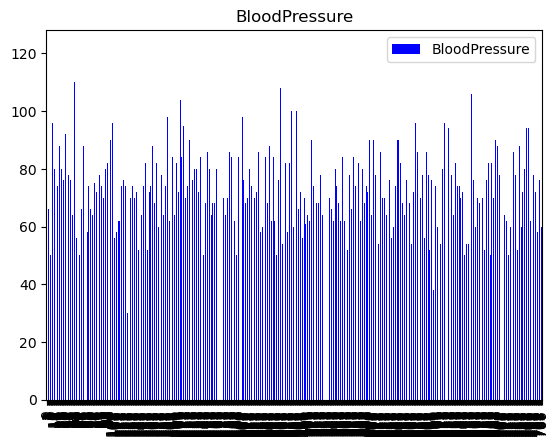

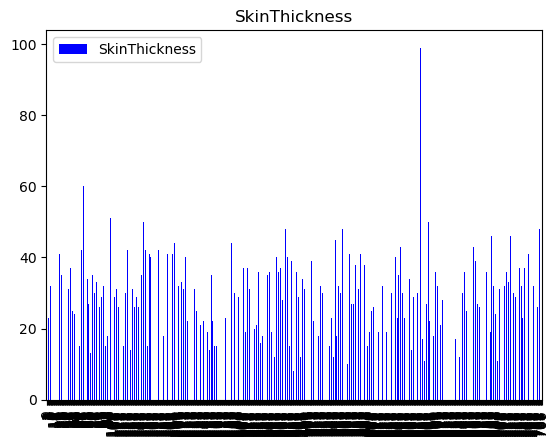

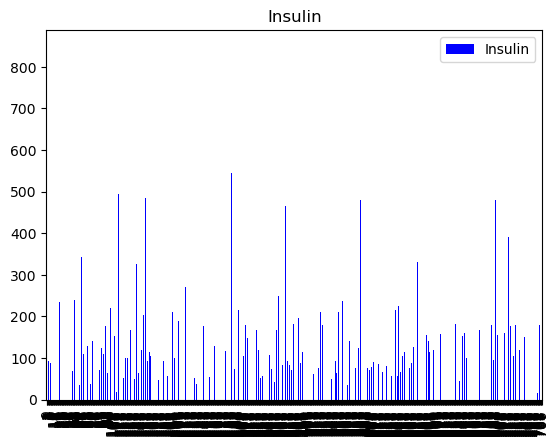

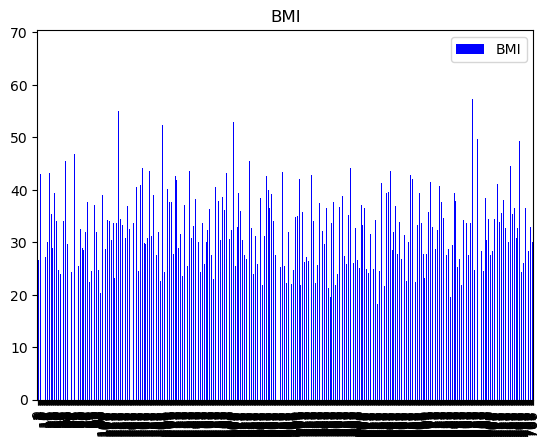

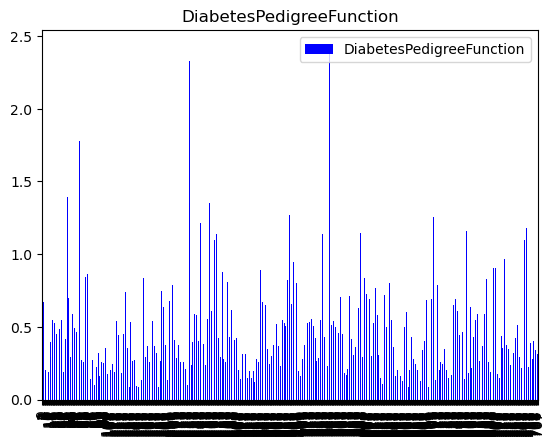

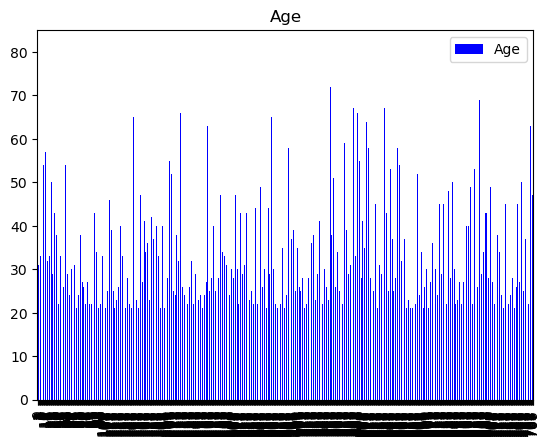

In [11]:
cols = list(df.columns)[:-1]
for col in cols:
    df[[col]].plot.bar(title=col, color='blue')

In [13]:
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [14]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [15]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

#### b. Data Wranggling 

In [29]:
# convert the 0 to nan
cols = list(df.columns)[:-1]
cols.remove('Pregnancies')
cols.remove('DiabetesPedigreeFunction')
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

# use the KNN imputer 
# Split the dataset into features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Use KNNImputer to impute missing values using regression
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Merge the imputed values with the target variable
df_imputed['Outcome'] = y

In [32]:
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,113.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,24.0,227.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


<AxesSubplot:>

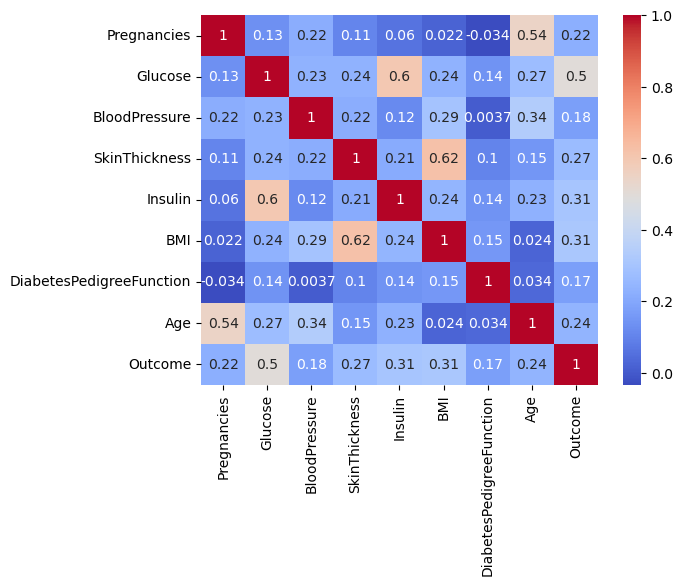

In [34]:
# Compute the correlation matrix
corr = df_imputed.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

0    500
1    268
Name: Outcome, dtype: int64


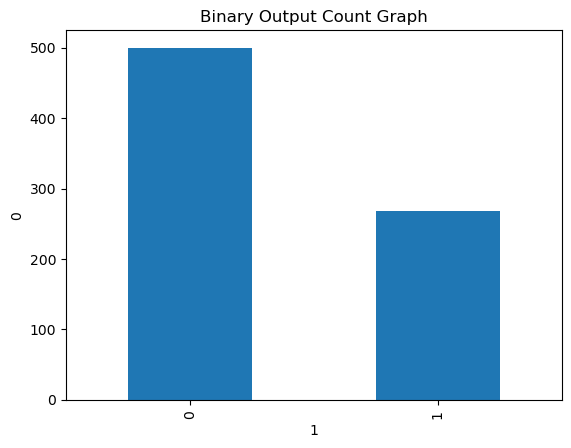

In [38]:
# Count the frequency of each unique value in the binary column
counts = df_imputed['Outcome'].value_counts()
print(counts)

# Create a bar graph of the counts
counts.plot(kind='bar')

# Add labels and title to the graph
plt.xlabel('1')
plt.ylabel('0')
plt.title('Binary Output Count Graph')
plt.show()

### 3. Base Model

In [42]:
# using lazyclassifier

X = df_imputed.drop(columns=['Outcome'])
y= df_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.00it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.79               0.79     0.79      0.79   
XGBClassifier                      0.77               0.76     0.76      0.77   
BaggingClassifier                  0.79               0.76     0.76      0.78   
LinearSVC                          0.79               0.76     0.76      0.78   
LinearDiscriminantAnalysis         0.79               0.76     0.76      0.78   
CalibratedClassifierCV             0.79               0.76     0.76      0.78   
RidgeClassifier                    0.79               0.76     0.76      0.78   
LogisticRegression                 0.79               0.75     0.75      0.78   
LGBMClassifier                     0.77               0.75     0.75      0.77   
RidgeClassifierCV                  0.79               0.75     0.75      0.78   
GaussianNB                  

### 4. Running the final model

In [44]:
X = df_imputed.drop(columns=['Outcome'])
y= df_imputed['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier and fit it on the training set
clf = NearestCentroid()
clf.fit(X_train, y_train)

# Calculate the train score
train_score = clf.score(X_train, y_train)
print("Train Score: ", train_score)

# Calculate the test score
test_score = clf.score(X_test, y_test)
print("Test Score: ", test_score)

Train Score:  0.6964618249534451
Test Score:  0.645021645021645


In [57]:
# Using undersampling tech

X = df_imputed.drop(columns=['Outcome'])
y= df_imputed['Outcome']

''''# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores)
print('Mean ROC AUC: %.3f' % mean(scores))'''

# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.676
